In [1]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr, doBy, plyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/"
SAVE_PDF = F
W = 6
H = 6
muDefault      = 4
deltaDefault   = 5
epsilonDefault = 30

data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods.csv'), header = F, sep = ";")

Loading required package: pacman


In [2]:
head(data)

V1,V2,V3,V4,V5,V6
0,MergeLast,10,4,5,806.479
1,MergeLast,15,4,5,937.483
2,MergeLast,20,4,5,1196.030
3,MergeLast,25,4,5,1596.971
4,MergeLast,30,4,5,2286.096
5,SpatialJoin,10,4,5,590.906


In [3]:
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
10,4,5,MergeLast,827.6581,41.62410
10,4,5,SpatialJoin,664.1981,239.69593
15,4,5,MergeLast,942.8541,24.36814
15,4,5,SpatialJoin,505.2922,10.09252
20,4,5,MergeLast,1200.9973,80.69838
20,4,5,SpatialJoin,585.2887,15.95848
25,4,5,MergeLast,1487.3482,248.14209
25,4,5,SpatialJoin,722.0828,27.90442
30,4,5,MergeLast,2157.5599,1023.87231
30,4,5,SpatialJoin,722.1781,49.76491


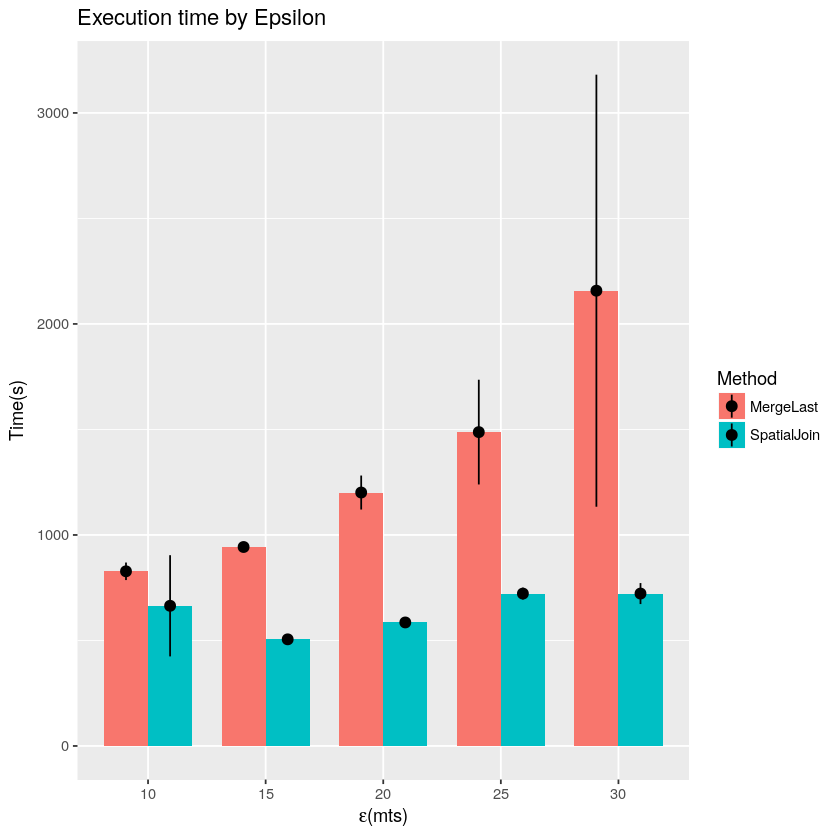

In [4]:
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [5]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running MergeLast", ]

stages = summaryBy(data=stages, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(stages)


Method,Epsilon,Stage,Time.m,Time.s
MergeLast,10,0.Reporting locations,5.050238,0.2805494
MergeLast,10,1.Set of disks for t_i,17.654921,22.2223185
MergeLast,10,2.Set of disks for t_i+delta,31.294603,3.5248765
MergeLast,10,3.Joining timestams,3.677143,0.2268894
MergeLast,10,4.Checking internals,54.328254,1.9639932
MergeLast,15,0.Reporting locations,4.930000,0.2782143


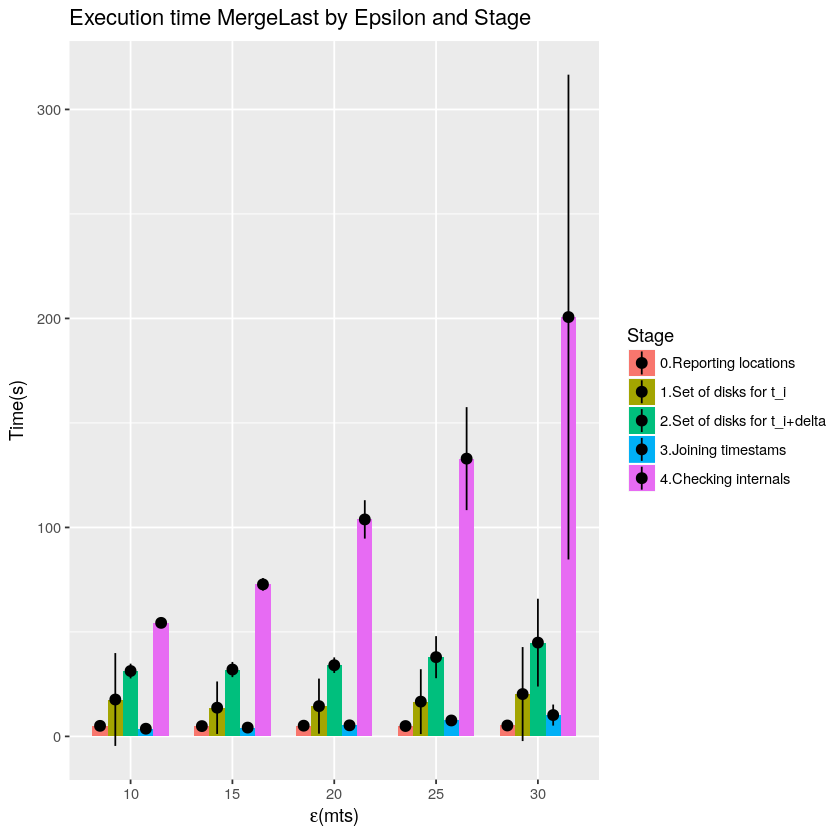

In [6]:
title = "Execution time MergeLast by Epsilon and Stage"
g = ggplot(data=stages[stages$Method == "MergeLast",], aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [7]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running SpatialJoin", ]

stages = summaryBy(data=stages, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(stages)


Method,Epsilon,Stage,Time.m,Time.s
MergeLast,10,0.Reporting locations,5.050238,0.2805494
MergeLast,10,1.Set of disks for t_i,17.654921,22.2223185
MergeLast,10,2.Set of disks for t_i+delta,31.294603,3.5248765
MergeLast,10,3.Joining timestams,3.677143,0.2268894
MergeLast,10,4.Checking internals,54.328254,1.9639932
MergeLast,10,Running MergeLast,827.658889,41.6229442


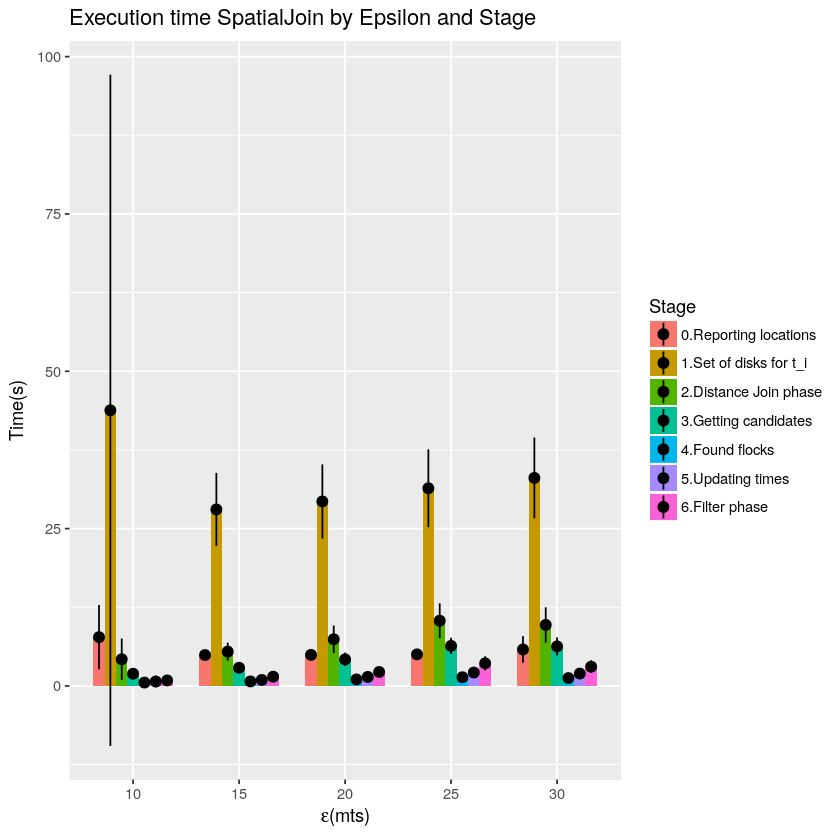

In [8]:
title = "Execution time SpatialJoin by Epsilon and Stage"
g = ggplot(data=stages[stages$Method == "SpatialJoin",], aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [9]:
mdfInternals = read.csv(paste0(RESEARCH_HOME, PATH, 'mdfInternals.csv'), header = F, sep = ";")
names(mdfInternals) = c("runID", "mdfID", "stageID", "Epsilon", "Mu", "Delta", "Method", "Stage", "Load", "Time")
mdfInternals$Epsilon = as.numeric(as.character(mdfInternals$Epsilon))
mdfInternals$Mu      = as.numeric(as.character(mdfInternals$Mu))
mdfInternals$Delta   = as.numeric(as.character(mdfInternals$Delta))
mdfInternals$Load    = as.numeric(as.character(mdfInternals$Load))
mdfInternals$Time    = as.numeric(as.character(mdfInternals$Time))

mdfInternals = summaryBy(data=mdfInternals, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(mdfInternals)


Method,Epsilon,Stage,Time.m,Time.s
MergeLast,10,A.Indexing points,3.1671376,0.39618730
MergeLast,10,B.Getting pairs,0.9988836,0.14603106
MergeLast,10,C.Computing centers,0.5723228,0.10995060
MergeLast,10,D.Indexing centers,0.7512963,0.11508645
MergeLast,10,E.Getting disks,1.5102116,0.28545536
MergeLast,10,F.Filtering less-than-mu disks,0.2960635,0.03513978


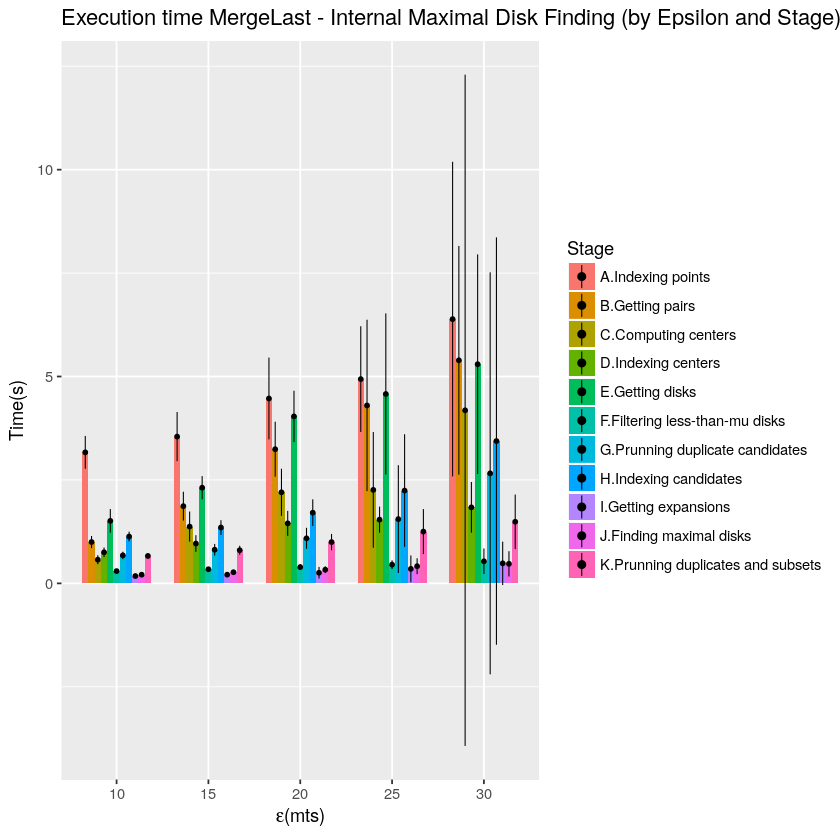

In [10]:
title = "Execution time MergeLast - Internal Maximal Disk Finding (by Epsilon and Stage)"
g = ggplot(data=mdfInternals, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75), size = 0.3, fatten = 1) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [16]:
mdfInfo = read.csv(paste0(RESEARCH_HOME, PATH, 'mdfInfo.csv'), header = F, sep = ";")
names(mdfInfo) = c("Method", "Epsilon", "Mu", "Delta", "Timestamp")
mdfInfo$Epsilon   = as.numeric(as.character(mdfInfo$Epsilon))
mdfInfo$Mu        = as.numeric(as.character(mdfInfo$Mu))
mdfInfo$Delta     = as.numeric(as.character(mdfInfo$Delta))
mdfInfo$Timestamp = as.numeric(as.character(mdfInfo$Timestamp))

mdfInfo


Method,Epsilon,Mu,Delta,Timestamp
MergeLast,10,4,5,0
MergeLast,10,4,5,4
MergeLast,10,4,5,-1
MergeLast,10,4,5,-1
MergeLast,10,4,5,-1
MergeLast,10,4,5,1
MergeLast,10,4,5,5
MergeLast,10,4,5,-1
MergeLast,10,4,5,-1
MergeLast,10,4,5,-1


In [18]:
query = "
SELECT
    Method, Epsilon, Timestamp, count(*)
FROM
    mdfInfo
GROUP BY
    Method, Epsilon, Timestamp
"
sqldf(query)

Method,Epsilon,Timestamp,count(*)
MergeLast,10,-1,189
MergeLast,10,0,9
MergeLast,10,1,9
MergeLast,10,2,9
MergeLast,10,3,9
MergeLast,10,4,9
MergeLast,10,5,9
MergeLast,10,6,9
MergeLast,10,7,9
MergeLast,10,8,9
